Conduct Exploratory Data Analysis   
- Compare class size and school size  
- Identify different ways to view data (elementary vs middle vs HS)  


In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import pylab as pl
%pylab inline
import seaborn as sns


import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy import linalg
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier

colors = ['y', 'm', 'c', 'r', 'g', 'b', 'k', 'DeepPink',\
          'DodgerBlue', 'Aquamarine', 'MediumSpringGreen',\
         'MidnightBlue', 'Gold', 'DarkSlateGray', 'LimeGreen', \
         'LightSeaGreen', 'Salmon', 'Indigo', 'DarkMagenta', \
         'Thistle', 'DeepSkyBlue', 'CadetBlue', \
         'BlueViolet', 'Chocolate', 'SaddleBrown', 'Maroon', \
         'Peru', 'DarkOrange', 'Teal', 'DarkKhaki']

Populating the interactive namespace from numpy and matplotlib


/Users/baileygriswold/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/Users/baileygriswold/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
path = '/Users/baileygriswold/Documents/Jupyter_Notebooks/Spring 2018/Machine Learning/ML4C_Project'
data =  pd.read_csv(path+'/Schmelt_bg.csv', index_col=0)

In [14]:
data.head()

,BNLONG,variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,K001,ATTPCTG01,88.76,92.53,90.76,91.04,91.62,91.57,91.88,92.76,...,93.98,93.56,94.45,93.49,93.0,94.86,94.81,93.87,95.12,95.62
1,K001,ATTPCTG02,91.33,91.37,92.66,92.0,92.26,93.87,92.71,93.02,...,93.16,94.99,94.87,95.46,93.83,94.68,94.86,95.12,95.38,95.55
2,K001,ATTPCTG03,92.43,93.11,92.36,93.55,92.9,92.77,94.14,93.56,...,94.57,94.37,95.75,95.55,95.14,95.57,95.35,95.26,95.74,96.32
3,K001,ATTPCTG04,92.36,93.75,92.44,91.88,93.99,93.17,92.38,94.3,...,94.0,94.81,93.66,95.5,95.65,96.35,95.85,95.16,95.67,96.5
4,K001,ATTPCTG05,93.04,92.92,92.61,93.2,92.07,94.12,93.25,93.45,...,94.02,94.43,95.38,94.12,95.74,95.81,96.4,94.99,95.64,95.79


In [100]:
data.variable.unique()

array(['ATTPCTG01', 'ATTPCTG02', 'ATTPCTG03', 'ATTPCTG04', 'ATTPCTG05',
       'ATTPCTKID', 'ATTPCTPRK', 'ATTPCTTOT', 'CBO', 'CLSAVGG01',
       'CLSAVGG02', 'CLSAVGG03', 'CLSAVGG04', 'CLSAVGGEN', 'CLSAVGKID',
       'CLSAVGOHS', 'CLSAVGPRK', 'CLSAVGSPD', 'CLSAVGTOT', 'CLSNUMG01',
       'CLSNUMG02', 'CLSNUMG03', 'CLSNUMG04', 'CLSNUMGEN', 'CLSNUMKID',
       'CLSNUMOHS', 'CLSNUMPRK', 'CLSNUMSPD', 'CLSNUMTOT', 'CTMSCH', 'DBN',
       'DMGPCTELLTOT', 'ENRNUMAFM', 'ENRNUMAFMpct', 'ENRNUMAMI',
       'ENRNUMAMIpct', 'ENRNUMASI', 'ENRNUMASIpct', 'ENRNUMELL',
       'ENRNUMELLpct', 'ENRNUMFEM', 'ENRNUMFEMpct', 'ENRNUMG01',
       'ENRNUMG01pct', 'ENRNUMG02', 'ENRNUMG02pct', 'ENRNUMG03',
       'ENRNUMG03pct', 'ENRNUMG04', 'ENRNUMG04pct', 'ENRNUMG05',
       'ENRNUMG05pct', 'ENRNUMG06', 'ENRNUMG06pct', 'ENRNUMG07',
       'ENRNUMG07pct', 'ENRNUMG08', 'ENRNUMG08pct', 'ENRNUMG09',
       'ENRNUMG09pct', 'ENRNUMG10', 'ENRNUMG10pct', 'ENRNUMG11',
       'ENRNUMG11pct', 'ENRNUMG12', 'ENRNUMG12pct'

*subselect 2012*  
*go back and look at just the regular schma*
Features of interest:
- 'CCDNUMFTE' - CCD: CLASSROOM TEACHERS (FTE), \_normd' normed by students
- 'ENRNUMAFM' -- ENROLLMENT: NUMBER BLACK 4804 'ENRNUMAFMpct'
- 'ENRNUMASI' -- ENROLLMENT: NUMBER ASIAN 4804
- 'ENRNUMHIS' -- ENROLLMENT: NUMBER HISPANIC('ENRNUMHISpct')
- 'ENRNUMTOT' -- ENROLLMENT: TOTAL 0
- 'ENRNUMWHT' - ENROLLMENT: NUMBER WHITE ('ENRNUMWHTpct')

In [4]:
#subset just 2012
df = data[['BNLONG', 'variable', '2012']]
#reshape data
df_2 = df.pivot(index='BNLONG', columns='variable', values='2012')
#impute nans
df_2.fillna(10000, inplace=True)

In [5]:
df_2['CCDNUMFTE'] = pd.to_numeric(df_2['CCDNUMFTE'])

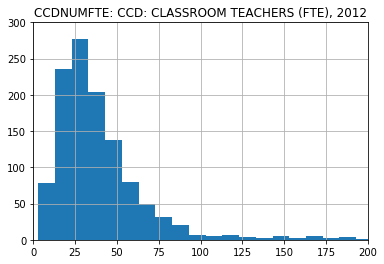

In [6]:
#change data type to float 
df_2['CCDNUMFTE'] = pd.to_numeric(df_2['CCDNUMFTE'])
#plot histogram
df_2['CCDNUMFTE'].hist(bins=1000)
plt.xlim(0,200)
plt.ylim(0,300)
plt.title('CCDNUMFTE: CCD: CLASSROOM TEACHERS (FTE), 2012')

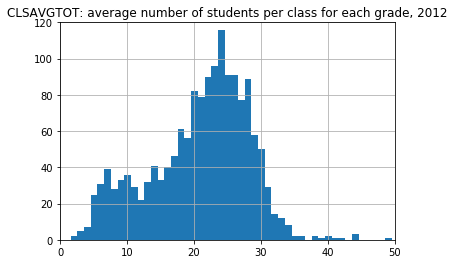

In [7]:
df_2['CLSAVGTOT'] = pd.to_numeric(df_2['CLSAVGTOT'])
df_2['CLSAVGTOT'].hist(bins=10000)
plt.xlim(0,50)
plt.ylim(0,120)
plt.title('CLSAVGTOT: average number of students per class for each grade, 2012')

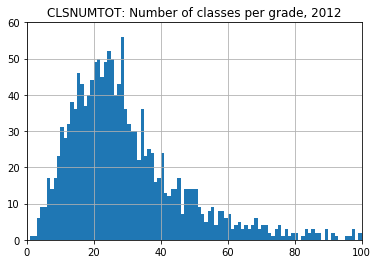

In [8]:
df_2['CLSNUMTOT'] = pd.to_numeric(df_2['CLSNUMTOT'])
df_2['CLSNUMTOT'].hist(bins=10000)
plt.xlim(0,100)
plt.ylim(0,60)
plt.title('CLSNUMTOT: Number of classes per grade, 2012')

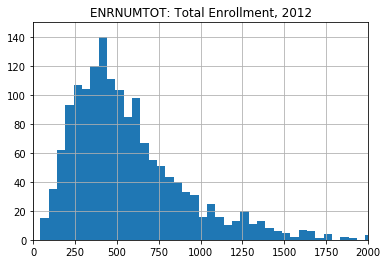

In [9]:
df_2['ENRNUMTOT'] = pd.to_numeric(df_2['ENRNUMTOT'])
df_2['ENRNUMTOT'].hist(bins=200)
plt.xlim(0,2000)
plt.ylim(0,150)
plt.title('ENRNUMTOT: Total Enrollment, 2012')

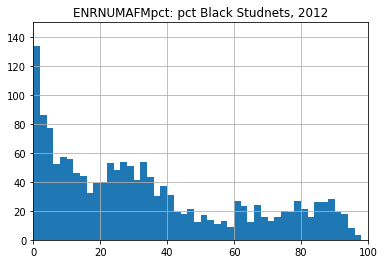

In [10]:
df_2['ENRNUMAFMpct'] = pd.to_numeric(df_2['ENRNUMAFMpct'])
df_2['ENRNUMAFMpct'].hist(bins=5000)
plt.xlim(0,100)
plt.ylim(0,150)
plt.title('ENRNUMAFMpct: pct Black Studnets, 2012')

Compare Class Size and Enrollment

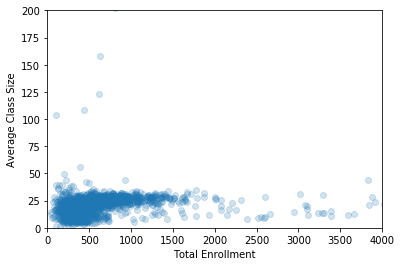

In [11]:
plt.plot(df_2['ENRNUMTOT'], df_2['CLSAVGTOT'], 'o' ,alpha=.2)
plt.ylim(0, 200)
plt.xlim(0,4000)
plt.ylabel('Average Class Size')
plt.xlabel('Total Enrollment')

Graph -- univariate of total enrollment, with average class size plotted along the bins

In [52]:
enroll_bin_counts = np.bincount(df_2['ENRNUMTOT'])

In [34]:
enroll_bins = np.arange(10001)

In [37]:
len(enroll_bin_counts)

10001

In [38]:
len(enroll_bins)

10001

In [30]:
len(enroll_bin_counts[enroll_bin_counts < 5])

9958

In [33]:
len(enroll_bin_counts[enroll_bin_counts > 0])

863

In [32]:
len(enroll_bin_counts[enroll_bin_counts >= 5])

43

In [49]:
df_2[df_2['ENRNUMTOT'] == enroll_bins[4]]['CLSAVGTOT'].mean()

nan

In [50]:
#get average class size per bin
avg_class_bin_mn = []
for bin_val in enroll_bins:
    avg_class_bin_mn.append(df_2[df_2['ENRNUMTOT'] == enroll_bins[bin_val]]['CLSAVGTOT'].mean())

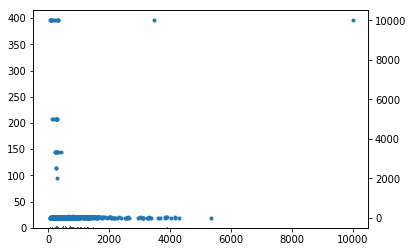

In [71]:
fig, ax = plt.subplots()
ax.bar(enroll_bins, enroll_bin_counts)
ax2 = ax.twinx()
ax2.plot(enroll_bins, avg_class_bin_mn, '.')